In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from torch.autograd import Variable

import torch.utils.data as dataset
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import torch.tensor as tensor
from tqdm import tqdm
import seaborn as sns

import model_2 as model_file
import module_split as module
import RF_module as RF
import scipy.io as sio

#For model class:
# import torch.nn.functional as F


In [2]:
# TRAINING:
def plot(y, t, img, x, RF_inactive, filled):
    plt.figure(figsize=(10,10))
    plt.rcParams['figure.figsize']=(10,10)

    plt.subplot(1,3,1)
    plt.imshow(y)
    plt.title('prediction')

    plt.subplot(1,3,2)
    plt.imshow(t)
    plt.title('target')

    plt.subplot(1,3,3)
    plt.imshow(img)
    plt.title('img')

    ###########
    # RECEPTIVE FIELDS
    ###########
    plt.figure(figsize=(14,5))
    plt.subplot(1,3,1)
    plt.imshow(x,  cmap='cividis')
    plt.title('input')
    # - - - - 
    plt.subplot(1,3,2)
    plt.imshow(RF_inactive,  cmap='cividis')
    plt.title('RF_inactive')

    plt.subplot(1,3,3)
    plt.imshow(filled, cmap = 'cividis')
    plt.title('filled in')

    plt.show()
    
    
# def make_unique_iterator(nn_data, set_t, batch_size, shuffle):
#     '''
    
#     Makes an iterator for this experiment. It allows iteration through indices and the signals
    
#     Returns an iterator.'''
    
#     un_im_index, un_trial_index = np.unique(im_index, return_index=True)
    
#     img_indexes = np.load(f'../../sorted_data/LFP/{set_t}/index_{set_t}_LFP_split.npy').astype(np.int)
    
#     data_indices = torch.from_numpy(un_im_index)
#     nn_data_T = nn_data.T
#     nn_data_t = nn_data[un_trial_index] 
#     data = dataset.TensorDataset(torch.from_numpy(nn_data_t), data_indices)
# #     data_indices = torch.from_numpy(img_indexes)
# #     data = dataset.TensorDataset(torch.from_numpy(nn_data.T), data_indices)
    
#     return dataset.DataLoader(data, batch_size, shuffle = shuffle)

In [3]:
# -----
# Some params
# -----
device = 1
cuda0 = torch.device(f'cuda:{device}')

batch_size = 4

# -----
# RF gaus maps
# ------
gaus = module.load_gausdata()

seen_images = module.load_ydata()
# ------
# Training
# ------
# nn_training = module.load_LFPdata('training')
# training_iterator = make_selection_iterator(nn_training, 'training', batch_size, shuffle = True)


set_t = 'training'

nn_data = np.load(f'../../sorted_data/LFP/{set_t}/LFP_{set_t}_splitted.npy')

im_index = np.load(f'../../sorted_data/LFP/{set_t}/index_{set_t}_LFP_split.npy').astype(np.int)


# ------
# Testing
# ------
nn_testing = module.load_LFPdata('testing')
testing_iterator = module.make_iterator(nn_testing, 'testing', batch_size, shuffle = False)

    

In [4]:
# -----
# Model, loss, & optimizer
# -----

in_channels=191
model = model_file.ResblocksDeconv(in_channels, (240,240))
# model = ran.model
if device >= 0:
    model.cuda(device)
# lossFunction = module.LossFunction(device)
lossFunction = module.VGGLoss(device)
optimizer = optim.Adam(model.parameters())


if in_channels == 2:
    inputtype = 'V1_V4'
if in_channels == 191:
    inputtype = 'all_channels'

/scratch/users/lynnle/MonkeyProject/git/models/recetpivefield_stuff/module_split.py:39: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  param = Variable(param, volatile=True)


In [5]:

# ### TO TEST THE OUTSHAPE

# hori_means, verti_means, std_avg = RF.extract_means_std()

# losses_train = []
# losses_test = []
# epochs = 2
# confidence_mask = RF.make_confidence_mask(hori_means, verti_means, std_avg)
# confidence_mask = torch.from_numpy(confidence_mask.astype('float32')).to(cuda0)

# loss_train = 0

# for sample, target_indices in tqdm(training_iterator, total=len(training_iterator)):
#     # -----
#     # Inputs
#     # -----
#     mean_signals  = sample[:,300]
#     gaus_expand_to_batch = gaus.expand([len(target_indices), 191, 240, 240])
#     mean_signals_expand_to_gaus = mean_signals.expand([240, 240, len(target_indices), 191])
#     mean_signals_expand_to_gaus = mean_signals_expand_to_gaus.transpose(0,2).transpose(1,3)
#     inputs = module.select_type_inputs(inputtype, gaus_expand_to_batch, mean_signals_expand_to_gaus)
#     inputs = inputs.to(cuda0)

#     # -----
#     # Targets
#     # -----
#     target_batch = seen_images[target_indices]
#     target_batch = target_batch.transpose(3,1).transpose(2,3)
#     target_batch = target_batch.to(cuda0)

#     # -----
#     # Outputs
#     # -----
#     y = model(inputs)


100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


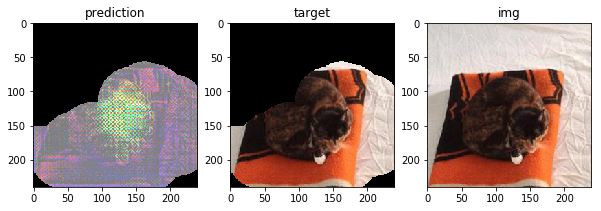

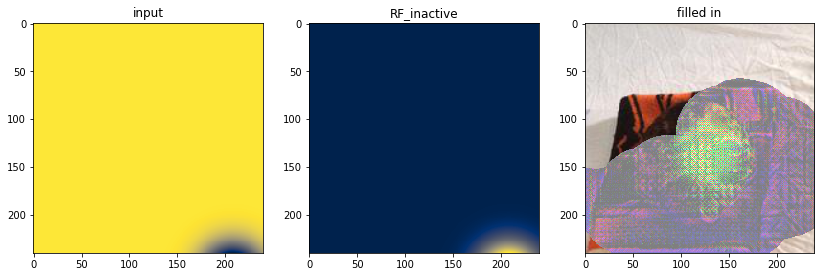

100%|██████████| 676/676 [02:04<00:00,  5.78it/s]


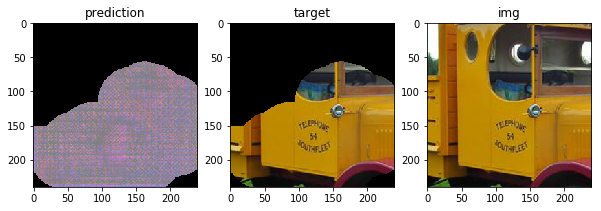

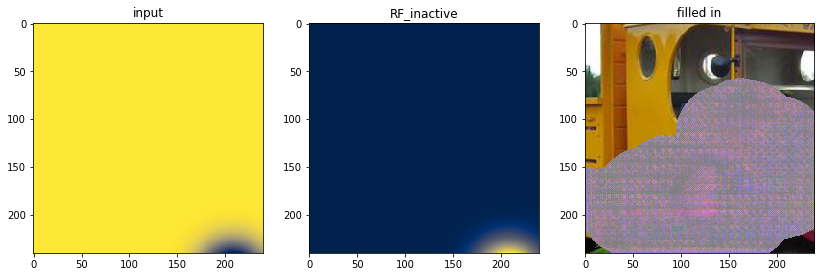

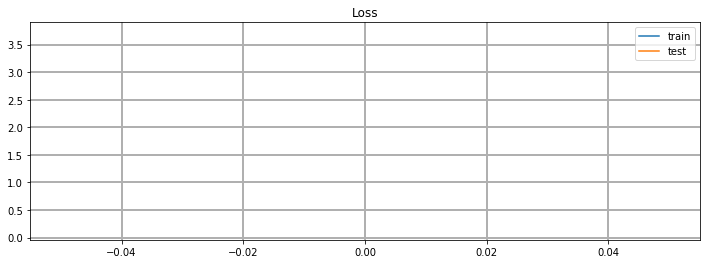

100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


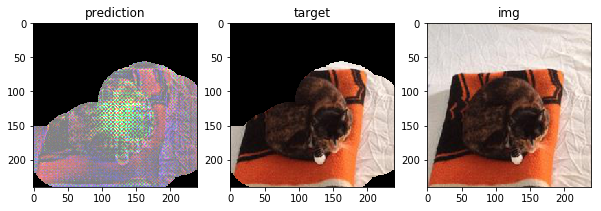

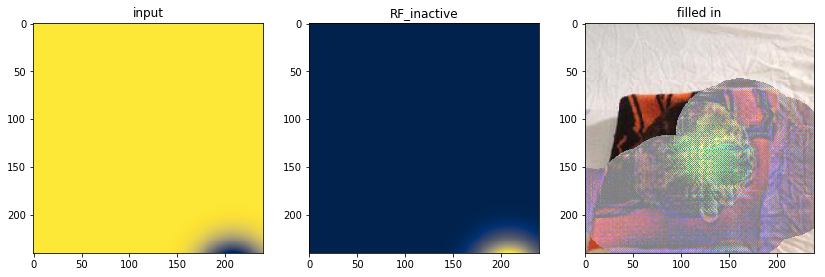

100%|██████████| 676/676 [02:01<00:00,  6.21it/s]


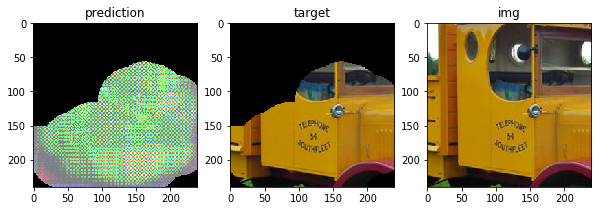

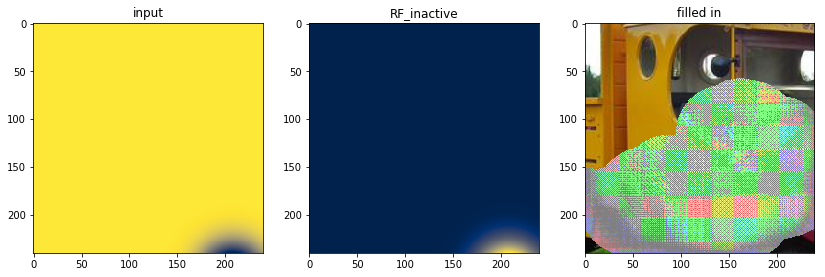

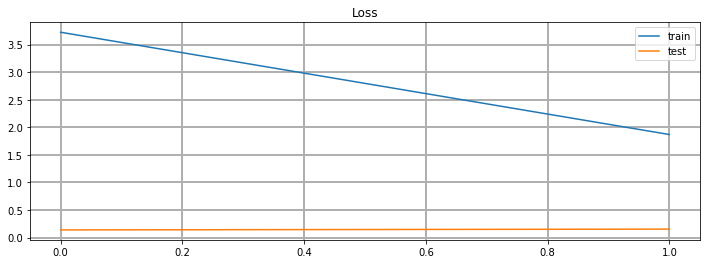

100%|██████████| 100/100 [00:38<00:00,  2.63it/s]


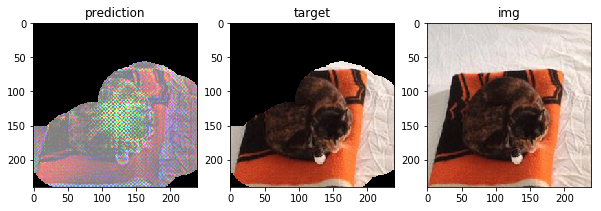

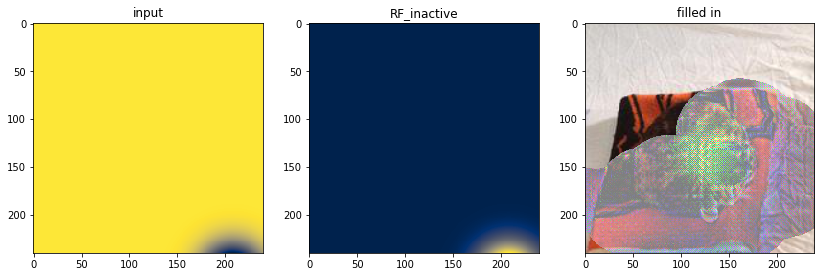

100%|██████████| 676/676 [02:01<00:00,  5.86it/s]


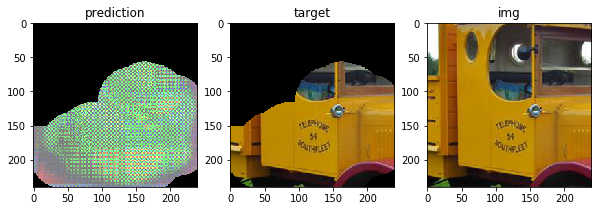

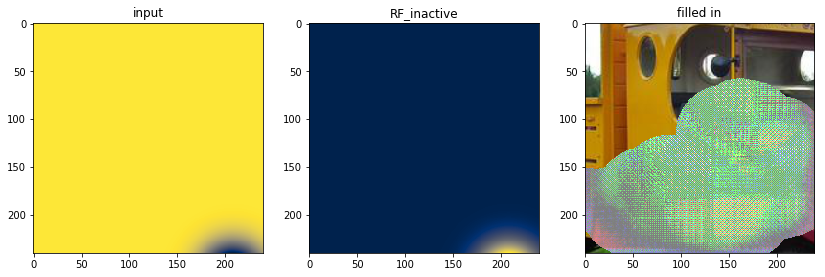

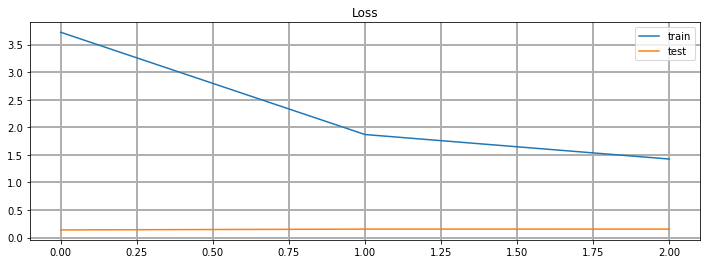

100%|██████████| 100/100 [00:37<00:00,  2.66it/s]


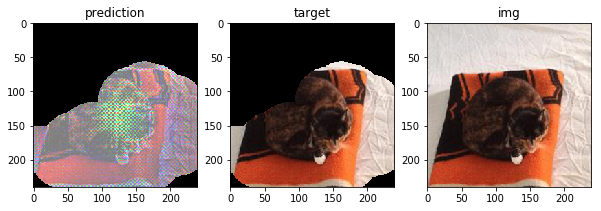

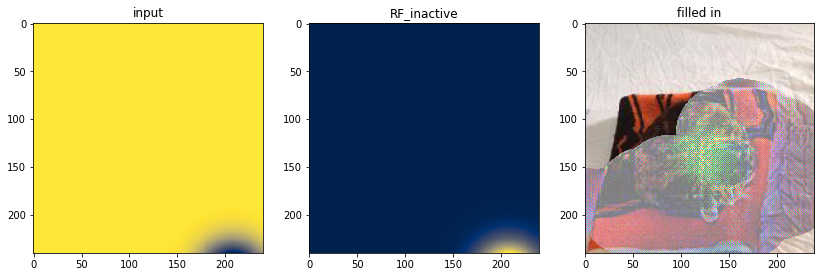

100%|██████████| 676/676 [02:00<00:00,  6.28it/s]


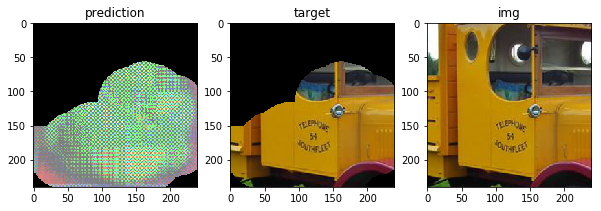

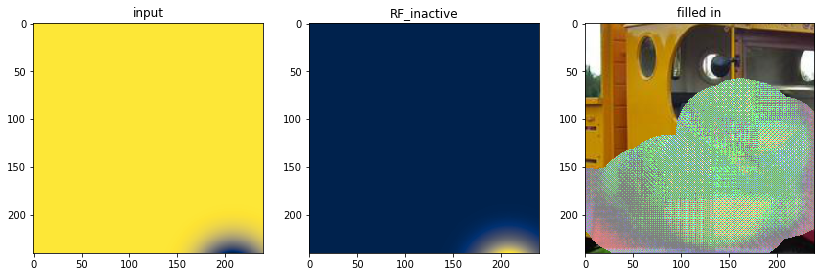

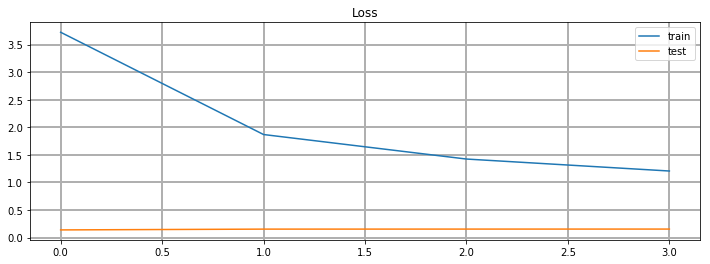

100%|██████████| 100/100 [00:37<00:00,  2.53it/s]


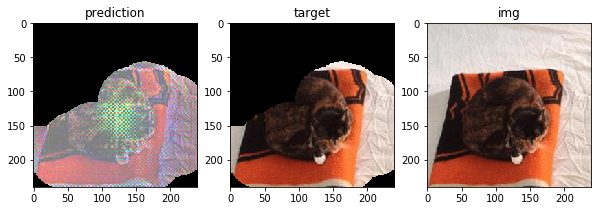

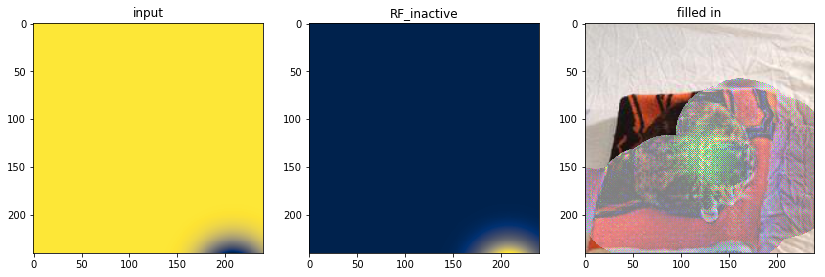

100%|██████████| 676/676 [02:00<00:00,  5.82it/s]


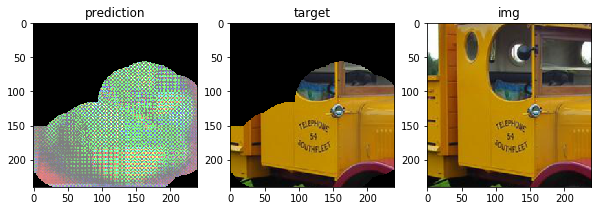

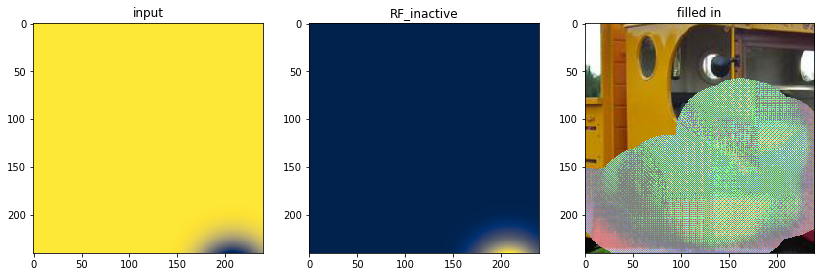

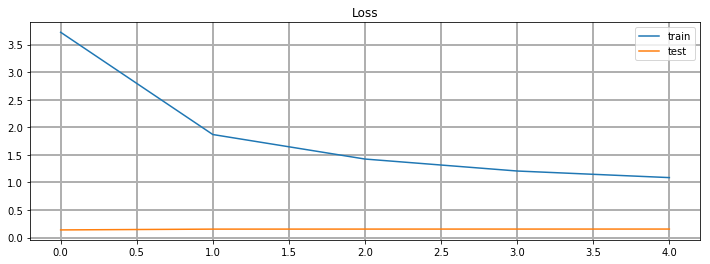

100%|██████████| 100/100 [00:37<00:00,  2.65it/s]


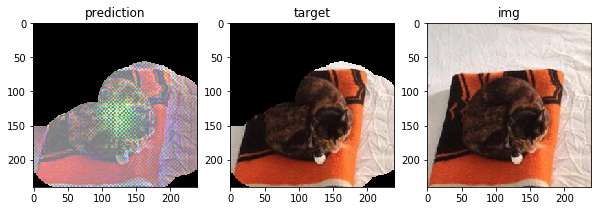

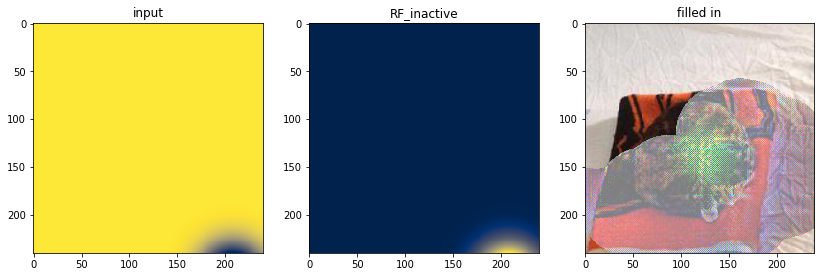

100%|██████████| 676/676 [02:01<00:00,  5.73it/s]


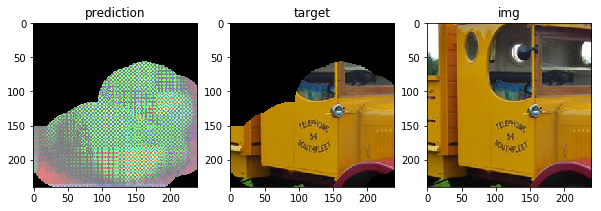

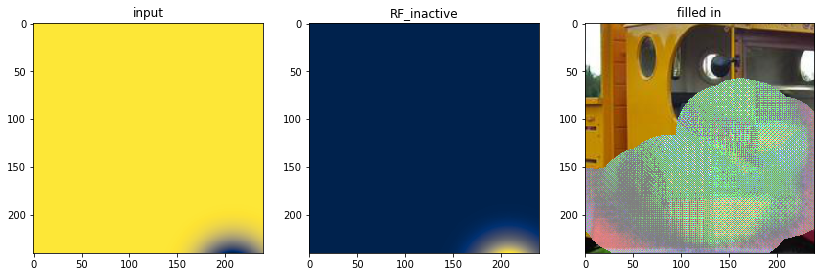

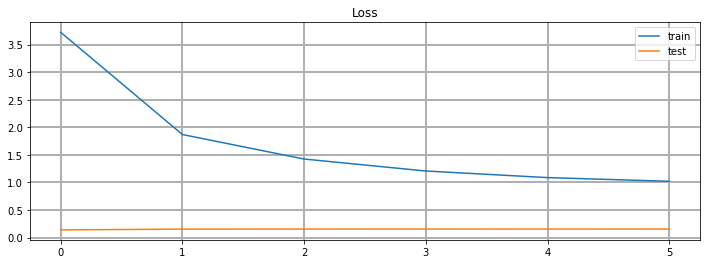

100%|██████████| 100/100 [00:37<00:00,  2.64it/s]


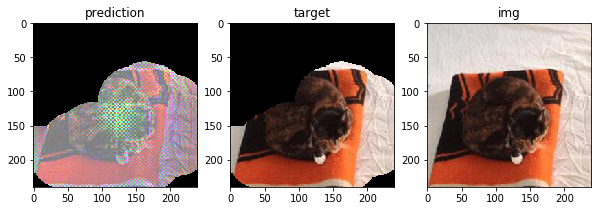

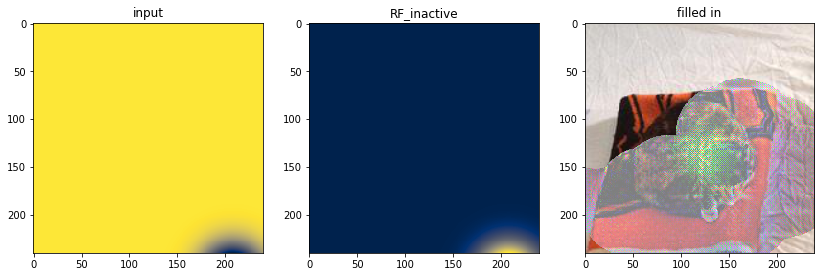

100%|██████████| 676/676 [02:00<00:00,  5.98it/s]


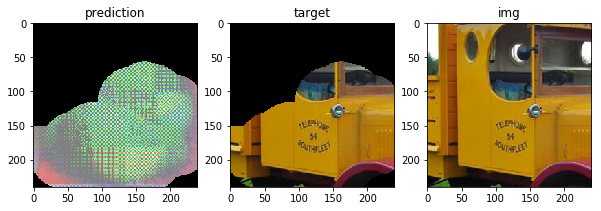

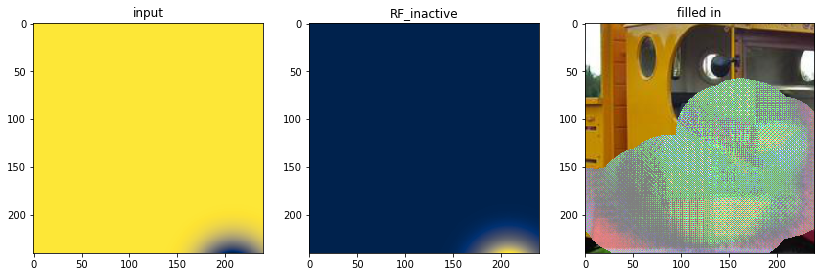

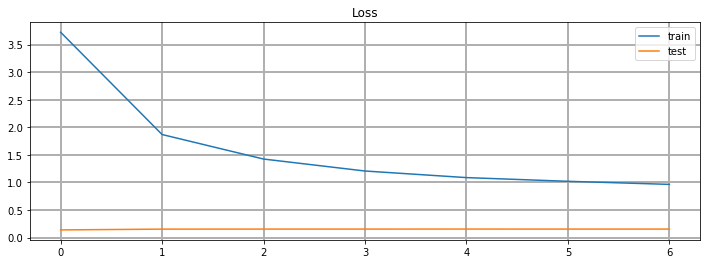

100%|██████████| 100/100 [00:37<00:00,  2.60it/s]


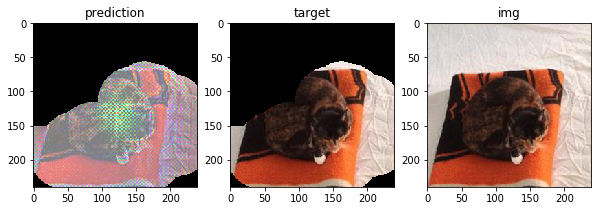

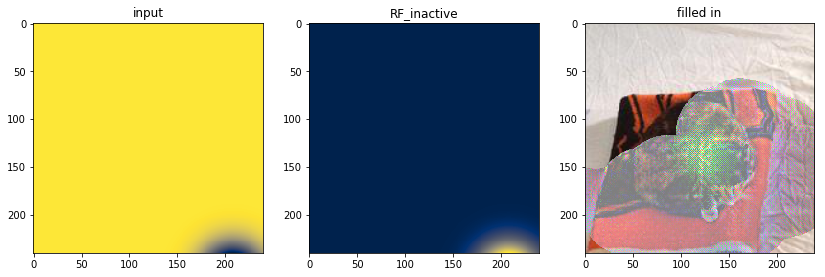

100%|██████████| 100/100 [00:37<00:00,  2.73it/s]


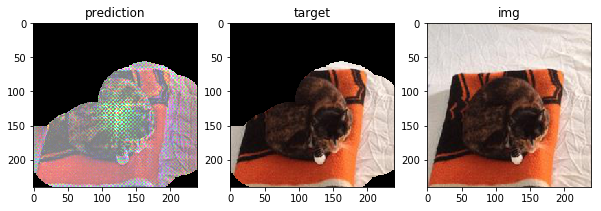

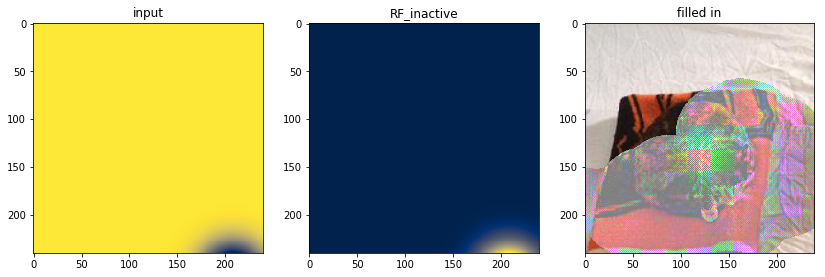

100%|██████████| 676/676 [02:00<00:00,  5.86it/s]


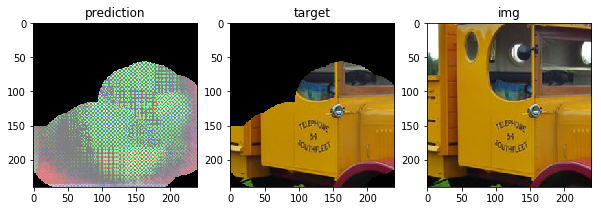

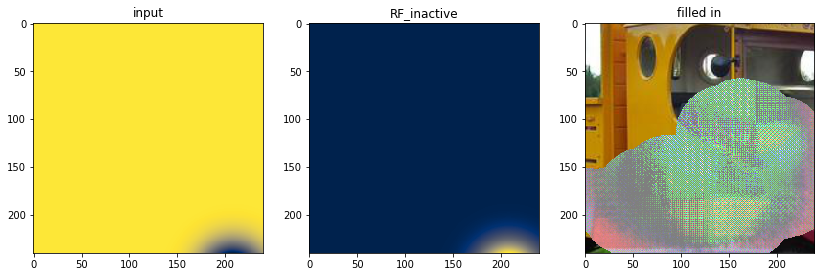

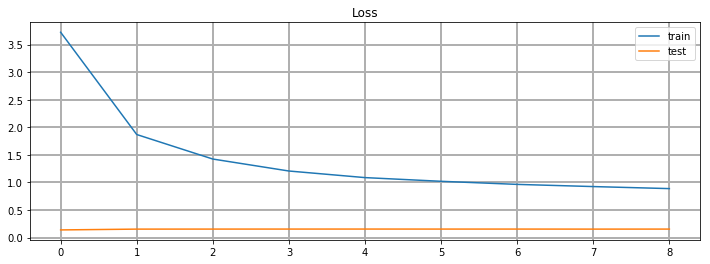

100%|██████████| 100/100 [00:37<00:00,  2.67it/s]


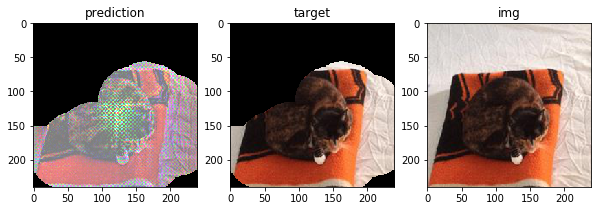

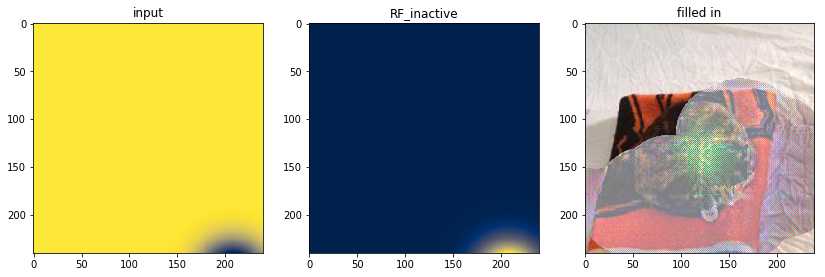

100%|██████████| 676/676 [02:01<00:00,  6.16it/s]


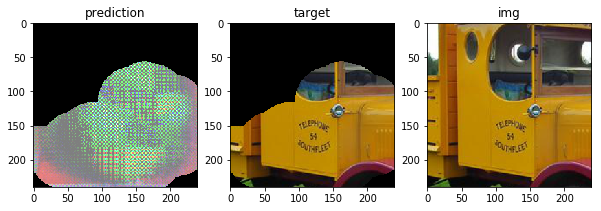

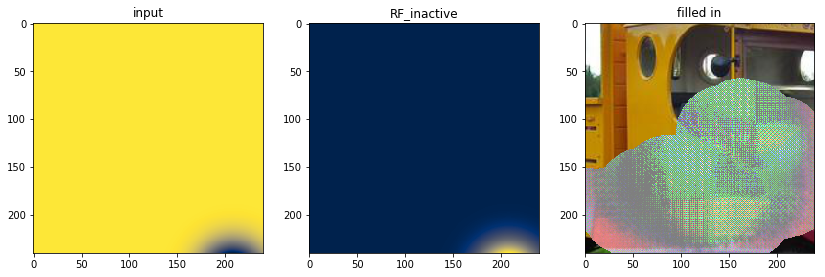

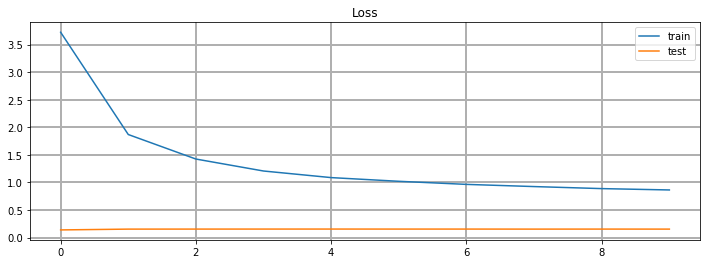

In [6]:
img_number = 0
first_im = nn_data.T[img_number]
first_im = first_im[np.newaxis,:,:].repeat(batch_size, axis=0)
first_im = torch.from_numpy(first_im)
first_index =[ im_index[img_number]] * batch_size


hori_means, verti_means, std_avg = RF.extract_means_std()

losses_train = []
losses_test = []
epochs = 10
confidence_mask = RF.make_confidence_mask(hori_means, verti_means, std_avg)
confidence_mask = torch.from_numpy(confidence_mask.astype('float32')).to(cuda0)

for e in range(epochs):  # loop over the dataset multiple times
    loss_train = 0
    model.train()

    for _ in tqdm(range(100)):
        # -----
        # Inputs
        # -----
        mean_signals  = first_im[:,300]
        gaus_expand_to_batch = gaus.expand([len(first_index), 191, 240, 240])
        mean_signals_expand_to_gaus = mean_signals.expand([240, 240, len(first_index), 191])
        mean_signals_expand_to_gaus = mean_signals_expand_to_gaus.transpose(0,2).transpose(1,3)
        inputs = module.select_type_inputs(inputtype, gaus_expand_to_batch, mean_signals_expand_to_gaus)
        inputs = inputs.to(cuda0)

        # -----
        # Targets
        # -----
        target_batch = seen_images[first_index]
        target_batch = target_batch.transpose(3,1).transpose(2,3)
        target_batch = target_batch.to(cuda0)

        # -----
        # Outputs
        # -----
        optimizer.zero_grad()
        y = model(inputs) 

        # -----
        # Before calculating loss, make a mask
        # -----
        y *= confidence_mask.expand_as(y)
        target_batch *= confidence_mask.expand_as(target_batch)

        # ------
        # Loss 
        # ------
        train_loss = lossFunction(y, target_batch)

        # ------
        # Backward & update
        # ------
        train_loss.backward()
        optimizer.step()

        # ------
        # Loss 
        # ------
        loss_train += train_loss.sum().item()
        
    losses_train.append(loss_train/10)

    # plots !!!: 

    batch_nr = 0
    V = 0
    RF_inactive = gaus_expand_to_batch[batch_nr][V]
    
    x = inputs[batch_nr][V].cpu().numpy()
    x = x-x.min()/x.sum()
    
    y = y[batch_nr].cpu().detach().numpy().transpose(1,2,0)
    t = target_batch[batch_nr].cpu().numpy().transpose(1,2,0)
    im0 = seen_images[first_index]
    img = im0[batch_nr].cpu().numpy()
    filled = (img - t)+y

    plot(y, t, img, x, RF_inactive, filled)


    with torch.no_grad():
        loss_test = 0
        model.eval()
        for sample, target_indices in tqdm(testing_iterator, total=len(testing_iterator)):
            # -----
            # Inputs
            # -----
            mean_signals  = sample[:,300]
            gaus_expand_to_batch = gaus.expand([len(target_indices), 191, 240, 240])
            mean_signals_expand_to_gaus = mean_signals.expand([240, 240, len(target_indices), 191])
            mean_signals_expand_to_gaus = mean_signals_expand_to_gaus.transpose(0,2).transpose(1,3)

            inputs = module.select_type_inputs(inputtype, gaus_expand_to_batch, mean_signals_expand_to_gaus)
            inputs = inputs.to(cuda0)
            # -----
            # Targets
            # -----
            target_batch = seen_images[target_indices]
            target_batch = target_batch.transpose(3,1).transpose(2,3)
            target_batch = target_batch.to(cuda0)
            # -----
            # Outputs
            # -----
            y = model(inputs)
            y *= confidence_mask.expand_as(y)
            target_batch *= confidence_mask.expand_as(target_batch)
            # ------
            # Loss 
            # ------
            test_loss = lossFunction(y, target_batch)
            loss_test += test_loss.sum().item()

    losses_test.append(loss_test/len(testing_iterator.sampler))
    RF_inactive = gaus_expand_to_batch[batch_nr][V]
    
    x = inputs[batch_nr][V].cpu().numpy()
    x = x-x.min()/x.sum()
    
    y = y[batch_nr].cpu().detach().numpy().transpose(1,2,0)
    t = target_batch[batch_nr].cpu().numpy().transpose(1,2,0)
    im0 = seen_images[target_indices]
    img = im0[batch_nr].cpu().numpy()
    filled = (img - t)+y

    plot(y, t, img, x, RF_inactive, filled)
    
    plt.figure(figsize=(12,4))
    # plt.ylim((1.1,2))

    plt.plot(losses_train, label='train', )
    plt.plot(losses_test, label = 'test')
    plt.legend()
    plt.grid(True, linewidth=2)
    plt.title('Loss')
    plt.show()

In [10]:
inputs[0].sum()

tensor(-175.5759, device='cuda:1')